Dataset CICLOVIAS Ciudad de Bs As

In [7]:
import pandas as pd
import requests
import geopandas as gpd
# from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import os
import numpy as np
# from bokeh.io import show, output_notebook, output_file, export_png
# from bokeh.models import (
#     GeoJSONDataSource,
#     HoverTool,
#     LinearColorMapper,
#     LinearInterpolator
    
# )
# from bokeh.plotting import figure
# from bokeh.palettes import Viridis6, Spectral6
# from bokeh.transform import linear_cmap
# from bokeh.resources import CDN
# from bokeh.embed import file_html
pd.set_option('display.max_columns', None)

Carga de datos de las bicisendas de la Ciudad de Buenos Aires https://data.buenosaires.gob.ar/dataset/ciclovias

In [70]:
ciclovias_georefenrenciadas = 'referencia_geografica_ciclovias_WGS84.geojson'
barrios_caba = 'barrios.csv'
volumen_ciclistas_anuales = './data bicicletas/volumen-ciclistas-anuales.csv'
volumen_ciclistas_mensuales = './data bicicletas/volumen-ciclistas-mensuales.csv'
puntos_censeo = './data bicicletas/puntos-censos-anuales.csv'

CSV´s a usar: https://data.buenosaires.gob.ar/dataset/ciclovias/archivo/0f0b0b0c-8b0c-4b0c-8b0c-4b0c8b0c4b0c

- barrios.csv
- referencia_geografica_ciclovias_WGS84.geojson
- volumen_ciclovias_anuales.csv
- puntos_censos_anuales.csv


In [10]:
data= gpd.read_file(barrios_caba)
barrios= gpd.GeoDataFrame(data, geometry='geometry')
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,MULTIPOLYGON (((-58.4528200492791 -34.59598865...,CHACARITA,15.00000000000,7724.85295457000,3115707.10626999987,BARRIO,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366..."
1,MULTIPOLYGON (((-58.4655768128541 -34.59655770...,PATERNAL,15.00000000000,7087.51329533000,2229829.03362999996,BARRIO,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562..."
2,MULTIPOLYGON (((-58.4237529813037 -34.59782733...,VILLA CRESPO,15.00000000000,8131.85707532000,3615977.55634000013,BARRIO,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495..."
3,MULTIPOLYGON (((-58.4946097568899 -34.61486523...,VILLA DEL PARQUE,11.00000000000,7705.38979708000,3399595.64148000022,BARRIO,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479..."
4,MULTIPOLYGON (((-58.4128700313088 -34.61411625...,ALMAGRO,5.00000000000,8537.90136849000,4050752.24524000008,BARRIO,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."


In [11]:
data = gpd.read_file(ciclovias_georefenrenciadas)
df_ciclovias = gpd.GeoDataFrame(data, geometry='geometry')
df_ciclovias.head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,long,sentido,cod_sent,observa,bicisenda,lado_ciclo,recorrid_x,ciclo_obse,tooltip_bi,red_jerarq,red_tp,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,56.38,DOBLE,2,None,Ciclovías,None,None,Construcción Año 2014,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,13,13,13,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42922 -34.55085, -58.429..."
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,297.26,DOBLE,2,None,Ciclovías,None,None,Construcción Año 2014,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.41117 -34.55768, -58.412..."
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,175.93,DOBLE,2,None,Ciclovías,None,None,Construcción Año 2014,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.40978 -34.55878, -58.410..."
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,9.40,DOBLE,2,corrección altura 8-1-03,Ciclovías,Por calzada paralela y adyacente a la vereda n...,None,Construcción Octubre de 2018,Ciclovía,VÍA LOCAL,None,12,12,12,COGHLAN,COGHLAN,COGHLAN,"MULTILINESTRING ((-58.48099 -34.56048, -58.481..."
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,488.48,DOBLE,2,corrección numeración 22-1,Ciclovías,Mano izquierda,Vereda,Construcción Año 2010,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42059 -34.58079, -58.417..."


In [12]:
data =  pd.read_csv(puntos_censeo)
puntos_censos = pd.DataFrame(data)
puntos_censos.head()

,X,Y,RECORRIDO,CENTROIDE,CRUCE,ÃREA
0,-58.481712,-34.544106,R001,600.0,DEHEZA@PINTO,Barrios
1,-58.480105,-34.544541,R001,601.0,ARIAS@QUINTANA,Barrios
2,-58.478704,-34.545025,R001,602.0,RAMALLO@ZAPIOLA,Barrios
3,-58.477295,-34.545521,R001,603.0,CORREA@CONESA,Barrios
4,-58.475889,-34.546015,R001,604.0,RUIZ HUIDOBRO@CRAMER,Barrios


In [13]:
df_volumen_ciclistas = pd.read_csv(volumen_ciclistas_anuales)
df_volumen_ciclistas.head()

,centroide,cruce,año,turno,cantidad_ciclistas,tipo_relevamiento
0,520,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",2013,mañana,19,macrocentro
1,520,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",2013,tarde,30,macrocentro
2,520,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",2014,mañana,10,macrocentro
3,520,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",2014,tarde,17,macrocentro
4,520,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",2015,mañana,9,macrocentro


In [14]:
df_volumen_ciclistas = pd.read_csv(volumen_ciclistas_anuales)
df_volumen_ciclistas = pd.DataFrame(df_volumen_ciclistas)

df_volumen_ciclistas = df_volumen_ciclistas[['centroide', 'cantidad_ciclistas', 'año','turno']]

df_volumen_ciclistas.head()


,centroide,cantidad_ciclistas,año,turno
0,520,19,2013,mañana
1,520,30,2013,tarde
2,520,10,2014,mañana
3,520,17,2014,tarde
4,520,9,2015,mañana


In [15]:
df_puntos_censeo = pd.read_csv(puntos_censeo)
df_puntos_censeo = pd.DataFrame(df_puntos_censeo)
df_puntos_censeo.head()

,X,Y,RECORRIDO,CENTROIDE,CRUCE,ÃREA
0,-58.481712,-34.544106,R001,600.0,DEHEZA@PINTO,Barrios
1,-58.480105,-34.544541,R001,601.0,ARIAS@QUINTANA,Barrios
2,-58.478704,-34.545025,R001,602.0,RAMALLO@ZAPIOLA,Barrios
3,-58.477295,-34.545521,R001,603.0,CORREA@CONESA,Barrios
4,-58.475889,-34.546015,R001,604.0,RUIZ HUIDOBRO@CRAMER,Barrios


In [16]:
df_puntos_censeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          795 non-null    float64
 1   Y          795 non-null    float64
 2   RECORRIDO  795 non-null    object 
 3   CENTROIDE  795 non-null    float64
 4   CRUCE      795 non-null    object 
 5   ÃREA      795 non-null    object 
dtypes: float64(3), object(3)
memory usage: 37.4+ KB


In [17]:
df_ciclovias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          3081 non-null   int64   
 1   codigo      3081 non-null   int64   
 2   nomoficial  3081 non-null   object  
 3   alt_izqini  3081 non-null   int64   
 4   alt_izqfin  3081 non-null   int64   
 5   alt_derini  3081 non-null   int64   
 6   alt_derfin  3081 non-null   int64   
 7   nomanter    1363 non-null   object  
 8   nom_mapa    3079 non-null   object  
 9   tipo_c      3081 non-null   object  
 10  long        3081 non-null   float64 
 11  sentido     3081 non-null   object  
 12  cod_sent    3081 non-null   int64   
 13  observa     631 non-null    object  
 14  bicisenda   3081 non-null   object  
 15  lado_ciclo  950 non-null    object  
 16  recorrid_x  178 non-null    object  
 17  ciclo_obse  2552 non-null   object  
 18  tooltip_bi  3081 non-null   object  
 19

Normalizacion de columna ciclo_obse para obtener año de construccion.

In [18]:
df_ciclovias['ciclo_obse'] = df_ciclovias['ciclo_obse'].str.replace(r'\D', '').replace('',np.nan)
df_ciclovias['ciclo_obse'] = df_ciclovias['ciclo_obse'].astype(float)



C:\Users\ismael\AppData\Local\Temp\ipykernel_15920\3650763263.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ciclovias['ciclo_obse'] = df_ciclovias['ciclo_obse'].str.replace(r'\D', '').replace('',np.nan)


Cambio Nombre de la columna 'ciclo_obse' a 'anio_construccion'

In [19]:
df_ciclovias.rename(columns={'ciclo_obse': 'anio_construccion'}, inplace=True)
df_ciclovias.head()

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,long,sentido,cod_sent,observa,bicisenda,lado_ciclo,recorrid_x,anio_construccion,tooltip_bi,red_jerarq,red_tp,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,56.38,DOBLE,2,None,Ciclovías,None,None,2014.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,13,13,13,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42922 -34.55085, -58.429..."
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,297.26,DOBLE,2,None,Ciclovías,None,None,2014.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.41117 -34.55768, -58.412..."
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,175.93,DOBLE,2,None,Ciclovías,None,None,2014.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.40978 -34.55878, -58.410..."
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,9.40,DOBLE,2,corrección altura 8-1-03,Ciclovías,Por calzada paralela y adyacente a la vereda n...,None,2018.0,Ciclovía,VÍA LOCAL,None,12,12,12,COGHLAN,COGHLAN,COGHLAN,"MULTILINESTRING ((-58.48099 -34.56048, -58.481..."
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,488.48,DOBLE,2,corrección numeración 22-1,Ciclovías,Mano izquierda,Vereda,2010.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42059 -34.58079, -58.417..."


In [20]:
df_geo = gpd.read_file(ciclovias_georefenrenciadas)
df_geo['ciclo_obse'] = df_geo['ciclo_obse'].str.replace(r'\D', '').replace('',np.nan)
df_geo['ciclo_obse'] = df_geo['ciclo_obse'].astype(float)
df_geo.rename(columns={'ciclo_obse': 'anio_construccion'}, inplace=True)
# df_geo = df_geo[df_geo['anio_construccion'] <= 2014]
df_geo.head()

C:\Users\ismael\AppData\Local\Temp\ipykernel_15920\3609690564.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_geo['ciclo_obse'] = df_geo['ciclo_obse'].str.replace(r'\D', '').replace('',np.nan)


,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,long,sentido,cod_sent,observa,bicisenda,lado_ciclo,recorrid_x,anio_construccion,tooltip_bi,red_jerarq,red_tp,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry
0,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,56.38,DOBLE,2,None,Ciclovías,None,None,2014.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,13,13,13,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42922 -34.55085, -58.429..."
1,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,297.26,DOBLE,2,None,Ciclovías,None,None,2014.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.41117 -34.55768, -58.412..."
2,1828,16003,"OBLIGADO RAFAEL, Av.Costanera",3452,4200,3451,4199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,175.93,DOBLE,2,None,Ciclovías,None,None,2014.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.40978 -34.55878, -58.410..."
3,1997,21059,TRONADOR,0,0,0,0,ESTOMBA Y PLAZA,TRONADOR,CALLE,9.40,DOBLE,2,corrección altura 8-1-03,Ciclovías,Por calzada paralela y adyacente a la vereda n...,None,2018.0,Ciclovía,VÍA LOCAL,None,12,12,12,COGHLAN,COGHLAN,COGHLAN,"MULTILINESTRING ((-58.48099 -34.56048, -58.481..."
4,4846,20075,SARMIENTO AV.,2602,3100,2601,3099,None,AV. SARMIENTO,AVENIDA,488.48,DOBLE,2,corrección numeración 22-1,Ciclovías,Mano izquierda,Vereda,2010.0,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42059 -34.58079, -58.417..."


In [21]:
pd.DataFrame.to_csv(df_geo, './data bicicletas/normalizada/ciclovias_georeferenciadas.csv')

In [22]:
ciclovias = pd.read_csv('./data bicicletas/normalizada/ciclovias_georeferenciadas.csv')
ciclovias.iloc[1305]

Unnamed: 0                                                        1305
id                                                                2720
codigo                                                           19078
nomoficial                                       ROLDAN, BELISARIO AV.
alt_izqini                                                        4602
alt_izqfin                                                        5100
alt_derini                                                        4601
alt_derfin                                                        5099
nomanter                                                DEL MONTE, AV.
nom_mapa                                           AV.BELISARIO ROLDAN
tipo_c                                                         AVENIDA
long                                                            558.02
sentido                                                          DOBLE
cod_sent                                                             2
observ

In [23]:
barrios = gpd.read_file(barrios_caba)
barrios = gpd.GeoDataFrame(barrios)
barrios = barrios[['BARRIO', 'geometry']]


In [24]:
puntos_censeo_anuales = gpd.GeoDataFrame(df_puntos_censeo, geometry=gpd.points_from_xy(df_puntos_censeo['X'], df_puntos_censeo['Y']))
puntos_censeo_anuales = puntos_censeo_anuales[puntos_censeo_anuales['X'] > -60]
puntos_censeo_anuales.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 794 entries, 0 to 794
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   X          794 non-null    float64 
 1   Y          794 non-null    float64 
 2   RECORRIDO  794 non-null    object  
 3   CENTROIDE  794 non-null    float64 
 4   CRUCE      794 non-null    object  
 5   ÃREA      794 non-null    object  
 6   geometry   794 non-null    geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 49.6+ KB


In [25]:


cantidad_bicicletas_geografica = pd.merge(left=df_volumen_ciclistas, right=puntos_censeo_anuales, left_on='centroide', right_on='CENTROIDE')
cantidad_bicicletas_geografica = gpd.GeoDataFrame(cantidad_bicicletas_geografica, geometry=gpd.points_from_xy(cantidad_bicicletas_geografica['X'], cantidad_bicicletas_geografica['Y']))
cantidad_bicicletas_geografica['cantidad_ciclistas'] = cantidad_bicicletas_geografica['cantidad_ciclistas']
cantidad_bicicletas_geografica.drop('CENTROIDE', axis=1, inplace=True)
# cantidad_bicicletas_geografica.drop(['ÃREA', 'cruce'], axis=1, inplace=True)


cantidad_bicicletas_geografica.head()

,centroide,cantidad_ciclistas,año,turno,X,Y,RECORRIDO,CRUCE,ÃREA,geometry
0,520,19,2013,mañana,-58.361548,-34.623278,R001,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",Macrocentro,POINT (-58.36155 -34.62328)
1,520,30,2013,tarde,-58.361548,-34.623278,R001,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",Macrocentro,POINT (-58.36155 -34.62328)
2,520,10,2014,mañana,-58.361548,-34.623278,R001,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",Macrocentro,POINT (-58.36155 -34.62328)
3,520,17,2014,tarde,-58.361548,-34.623278,R001,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",Macrocentro,POINT (-58.36155 -34.62328)
4,520,9,2015,mañana,-58.361548,-34.623278,R001,"RAWSON DE DELLEPIANE, ELVIRA@DEALESSI, PIERINA",Macrocentro,POINT (-58.36155 -34.62328)


In [26]:
pd.DataFrame.to_csv(cantidad_bicicletas_geografica, './data bicicletas/normalizada/volumen_ciclistas_geografica.csv', index=False)

In [27]:
# output_notebook()

# geo_source = GeoJSONDataSource(geojson=df_geo.to_json())
# geo_source_barrios = GeoJSONDataSource(geojson=barrios.to_json())
# geo_source_puntos_censeo = GeoJSONDataSource(geojson=cantidad_bicicletas_geografica.to_json())

# mapper = linear_cmap(field_name='cantidad_ciclistas', palette=Spectral6 ,high=max(cantidad_bicicletas_geografica['cantidad_ciclistas']),low=min(cantidad_bicicletas_geografica['cantidad_ciclistas']) )
# color_mapper = LinearColorMapper(palette=Viridis6)



# TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

# p = figure(title="Ciclovias", tools=TOOLS, width=800, height=800)
# p.grid.grid_line_color = None
# p.xaxis.axis_label = 'Longitud'
# p.yaxis.axis_label = 'Latitud'
# p.patches('xs', 'ys', fill_alpha=0.7, fill_color={'field': 'objectid', 'transform': color_mapper}, 
#           line_color='red', line_width=0.2, source=geo_source_barrios)

# p.patches('xs', 'ys', fill_alpha=0.7, fill_color={'field': 'objectid', 'transform': color_mapper}, 
#           line_color='blue', line_width=0.5, source=geo_source)

# p.scatter(x='X', y='Y', fill_alpha=0.7, color=mapper, size='cantidad_ciclistas', source=geo_source_puntos_censeo, level='overlay')



# hover = p.select_one(HoverTool)
# hover.point_policy = "follow_mouse"
# hover.tooltips = [("Interseccion:", "@CRUCE")]
# output_file("bar_sorted.html")
# show(p)

<Figure size 432x288 with 0 Axes>

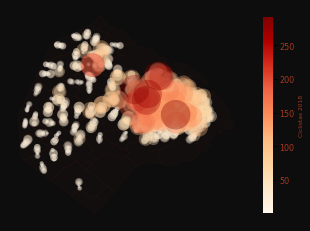

In [32]:




caba = plt.figure()
caba = barrios.plot(color='#A6381F', edgecolor='#A6381F', alpha=0.04,  zorder=1)
# caba = df_ciclovias.plot(ax=caba, color='#A6381F',  zorder=2, linewidth=0.5)
# gridcrs = barrios.crs
# cantidad_bicicletas_geografica['geometry'] = cantidad_bicicletas_geografica['geometry'].to_crs(crs = gridcrs)
caba.grid(False)
caba.axis('off')
ax = caba.get_figure()
ax.patch.set_facecolor('#0D0D0D')
puntos = cantidad_bicicletas_geografica[(cantidad_bicicletas_geografica['año'] == 2018)].sort_values(by='cantidad_ciclistas', ascending=True) 
caba = plt.scatter(puntos['X'], puntos['Y'], c=puntos['cantidad_ciclistas'], cmap='OrRd' , s=puntos['cantidad_ciclistas']*3, alpha=0.35, zorder=3, edgecolors='none')






caba = plt.colorbar(cm.ScalarMappable(norm=Normalize(vmin=puntos['cantidad_ciclistas'].min() , vmax=puntos['cantidad_ciclistas'].max()), cmap='OrRd'), shrink=0.9)
caba.ax.tick_params(labelsize=8, labelcolor='#A6381F')
caba.outline.set_visible(False)
caba.set_label('Ciclistas 2018', fontsize=6, color='#A6381F')
# m = plt.scatter(cantidad_bicicletas_geografica['X'], cantidad_bicicletas_geografica['Y'], c=cantidad_bicicletas_geografica['cantidad_ciclistas'], s=cantidad_bicicletas_geografica['cantidad_ciclistas']*2, cmap='viridis')
ax.savefig('ciclovias.png', dpi=450, bbox_inches='tight', pad_inches=0.0)

plt.show()

In [60]:
barrios.head()

,BARRIO,geometry
0,CHACARITA,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366..."
1,PATERNAL,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562..."
2,VILLA CRESPO,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495..."
3,VILLA DEL PARQUE,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479..."
4,ALMAGRO,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."


In [76]:
puntos_censeo_anuales_barrios = puntos_censeo_anuales
puntos_censeo_anuales_barrios.head()

,X,Y,RECORRIDO,CENTROIDE,CRUCE,ÃREA,geometry,barrio
0,-58.481712,-34.544106,R001,600.0,DEHEZA@PINTO,Barrios,POINT (-58.48171 -34.54411),SAAVEDRA
1,-58.480105,-34.544541,R001,601.0,ARIAS@QUINTANA,Barrios,POINT (-58.48011 -34.54454),SAAVEDRA
2,-58.478704,-34.545025,R001,602.0,RAMALLO@ZAPIOLA,Barrios,POINT (-58.47870 -34.54502),SAAVEDRA
3,-58.477295,-34.545521,R001,603.0,CORREA@CONESA,Barrios,POINT (-58.47729 -34.54552),SAAVEDRA
4,-58.475889,-34.546015,R001,604.0,RUIZ HUIDOBRO@CRAMER,Barrios,POINT (-58.47589 -34.54602),SAAVEDRA


In [64]:
for barrio in barrios['geometry']:
    for point in puntos_censeo_anuales_barrios['geometry']:
        
        if barrio.contains(point):
            puntos_censeo_anuales_barrios['barrio'][puntos_censeo_anuales_barrios['geometry'] == point] = barrios['BARRIO'][barrios['geometry'] == barrio].values[0]
           

C:\Users\ismael\AppData\Local\Temp\ipykernel_15920\3639471587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puntos_censeo_anuales_barrios['barrio'][puntos_censeo_anuales_barrios['geometry'] == point] = barrios['BARRIO'][barrios['geometry'] == barrio].values[0]
C:\Users\ismael\AppData\Local\Temp\ipykernel_15920\3639471587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puntos_censeo_anuales_barrios['barrio'][puntos_censeo_anuales_barrios['geometry'] == point] = barrios['BARRIO'][barrios['geometry'] == barrio].values[0]
C:\Users\ismael\AppData\Local\Temp\ipykernel_15920\3639471587.py:5: SettingWithCopyWarning: 

In [83]:
puntos_censeo_anuales_barrios.head()

,X,Y,RECORRIDO,CENTROIDE,CRUCE,ÃREA,geometry,barrio
0,-58.481712,-34.544106,R001,600.0,DEHEZA@PINTO,Barrios,POINT (-58.48171 -34.54411),SAAVEDRA
1,-58.480105,-34.544541,R001,601.0,ARIAS@QUINTANA,Barrios,POINT (-58.48011 -34.54454),SAAVEDRA
2,-58.478704,-34.545025,R001,602.0,RAMALLO@ZAPIOLA,Barrios,POINT (-58.47870 -34.54502),SAAVEDRA
3,-58.477295,-34.545521,R001,603.0,CORREA@CONESA,Barrios,POINT (-58.47729 -34.54552),SAAVEDRA
4,-58.475889,-34.546015,R001,604.0,RUIZ HUIDOBRO@CRAMER,Barrios,POINT (-58.47589 -34.54602),SAAVEDRA


In [89]:
volumen_ciclistas_anuales_barrios = df_volumen_ciclistas
volumen_ciclistas_anuales_barrios['barrios'] = np.nan
volumen_ciclistas_anuales_barrios.head()


,centroide,cantidad_ciclistas,año,turno,barrios
0,520,19,2013,mañana,NaN
1,520,30,2013,tarde,NaN
2,520,10,2014,mañana,NaN
3,520,17,2014,tarde,NaN
4,520,9,2015,mañana,NaN


In [92]:
for centroide in volumen_ciclistas_anuales_barrios['centroide']:
    for centroides in puntos_censeo_anuales_barrios['CENTROIDE']:
        
        if centroide == centroides:
            volumen_ciclistas_anuales_barrios['barrios'][volumen_ciclistas_anuales_barrios['centroide'] == centroide] = puntos_censeo_anuales_barrios['barrio'][puntos_censeo_anuales_barrios['CENTROIDE'] == centroides].values[0]

C:\Users\ismael\AppData\Local\Temp\ipykernel_15920\2112904464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volumen_ciclistas_anuales_barrios['barrios'][volumen_ciclistas_anuales_barrios['centroide'] == centroide] = puntos_censeo_anuales_barrios['barrio'][puntos_censeo_anuales_barrios['CENTROIDE'] == centroides].values[0]


In [99]:
volumen_ciclistas_anuales_barrios['año'] = pd.to_datetime(volumen_ciclistas_anuales_barrios['año'], format='%Y')
volumen_ciclistas_anuales_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   centroide           9004 non-null   int64         
 1   cantidad_ciclistas  9004 non-null   int64         
 2   año                 9004 non-null   datetime64[ns]
 3   turno               9004 non-null   object        
 4   barrios             8992 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 351.8+ KB


In [98]:
volumen_ciclistas_anuales_barrios.to_csv('./data bicicletas/normalizada/volumen_ciclistas_anuales_barrios.csv', index=False)

<AxesSubplot:>

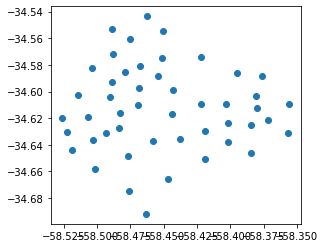

In [110]:
barrios_points = barrios
barrios_points['geometry'] = barrios_points['geometry'].centroid
barrios_points['longitud'] = barrios_points['geometry'].x
barrios_points['latitud'] = barrios_points['geometry'].y

barrios_points.plot()

In [111]:
barrios_points.head()

,BARRIO,geometry,longitud,latitud
0,CHACARITA,POINT (-58.45418 -34.58837),-58.454180,-34.588369
1,PATERNAL,POINT (-58.46866 -34.59742),-58.468665,-34.597421
2,VILLA CRESPO,POINT (-58.44272 -34.59883),-58.442725,-34.598830
3,VILLA DEL PARQUE,POINT (-58.49068 -34.60425),-58.490677,-34.604247
4,ALMAGRO,POINT (-58.42174 -34.60923),-58.421745,-34.609227


In [104]:
barrios_points.to_csv('./data bicicletas/normalizada/barrios_points.csv', index=False)